St20183508

# Geospatial Analysis

## Task 2.3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

In [3]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [4]:
API_key= 'UMyukbXtQPw7Jt7ATKEfkgjZ1'
API_secret= 'N808rS7eCxni438u8E06q1w6xGKnm2WNjSEuZM6Sdz8SzLnxW2'
access_token= '1323994928960180224-VlJ3Q9jBB14wmPpeUea32y8tGfLbBv'
access_token_secret= 'VMXkUm61mEe3SmHPg3pLx36OHVgaQXYysEbXvhqauesSR'

In [5]:
auth = tw.OAuthHandler(API_key, API_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# Cleaning Tweets Function
# Removing URL from tweets

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [7]:
search_term = "#CovidSecondWave"


tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(500)

In [8]:
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]


sentiment_values_P = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values_P[0]

sentiment_values_S = [[tweet.sentiment.subjectivity, str(tweet)] for tweet in sentiment_objects]
sentiment_values_S[1]

sentiment_df_P = pd.DataFrame(sentiment_values_P, columns=["polarity", "tweet"])

sentiment_df_P.head()

,polarity,tweet
0,0.35,RT Shilpa1308 Donning a full PPE kit Tamil Nad...
1,0.35,RT Shilpa1308 Donning a full PPE kit Tamil Nad...
2,0.00,RT KettavanOffcl Please guys Say Some precauti...
3,0.00,Telangana lockdown for another 10 days and dai...
4,0.20,Salute you Sir HindiJournalismDay2021 Its grat...


In [9]:
sentiment_df_P.shape

(500, 2)

In [10]:
sentiment_df_S = pd.DataFrame(sentiment_values_S, columns=["subjectivity", "tweet"])
sentiment_df_S.head()

,subjectivity,tweet
0,0.55,RT Shilpa1308 Donning a full PPE kit Tamil Nad...
1,0.55,RT Shilpa1308 Donning a full PPE kit Tamil Nad...
2,0.00,RT KettavanOffcl Please guys Say Some precauti...
3,0.00,Telangana lockdown for another 10 days and dai...
4,0.10,Salute you Sir HindiJournalismDay2021 Its grat...


In [11]:
sentiment_df_S.shape

(500, 2)

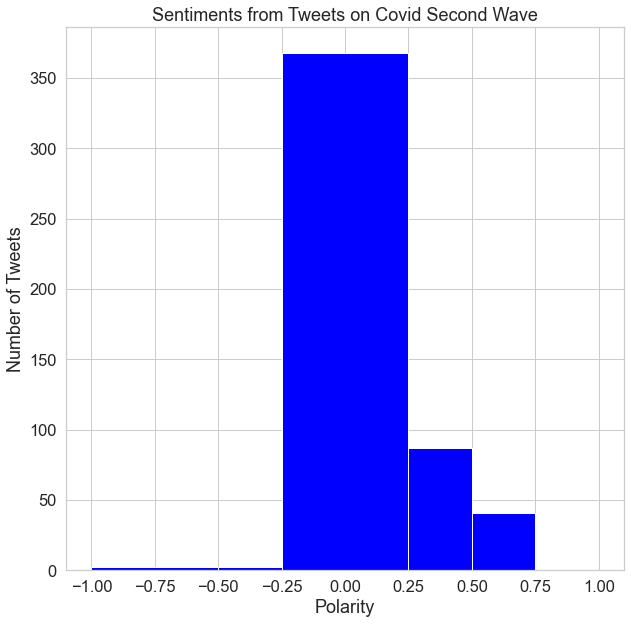

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

sentiment_df_P.hist(bins=[-1,-0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Covid Second Wave")
plt.xlabel("Polarity")
plt.ylabel("Number of Tweets")
plt.show()

The above histogram depicts the polarity values of 500 tweets on #CovidSecondWave. It can be infered that majority 

of tweets had neutral statements as its text. Other remaining tweets had more positive statements as compared to 

negative statements. This shows that most of the people are unsure and are waiting patiently to analyse the effects 

of the second wave of this pandemic to make better decisions regarding future covid vaccinations. Therefore, it can 

be seen that people have mixed opinions about covid second wave as some people are going through difficult 

situations, making negative statements and other are trying to help them by spreading positivity so that everyone 

can patiently tackle the second covid wave as a team.   

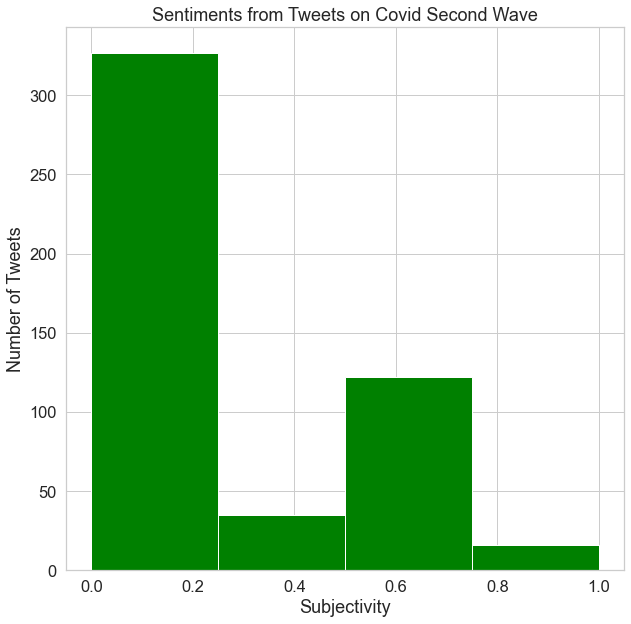

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

sentiment_df_S.hist(bins=[0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color= "green")

plt.title("Sentiments from Tweets on Covid Second Wave")
plt.xlabel("Subjectivity")
plt.ylabel("Number of Tweets")
plt.show()

The above histogram presents the subjectivity of the same 500 tweets on #CovidSecondWave. The graph shows that 

majority of the tweets states positive sentiments or opinions of the people. This means that the people are sharing 

more personal information and experiences rather than mentioning facts. This also shows that other remaining tweets have 

more neutral sentiments. It can infered that people are more optimistic as they might belive 

in future covid vaccinations can improve the current situation.  

## Recommendations for Covid second wave

1) Continue to practice COVID-19 precautions, such as physical distancing, hand-washing and mask-wearing.

2) Stay in touch with local health authorities, who can provide information if COVID-19 cases begin to increase in the city or town.

3) Make sure your household maintains two weeks’ worth of food, prescription medicines and supplies.

4) Work with your doctor to ensure that everyone in your household, especially children, is up to date on vaccines.